In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3 * X[:,0] ** 2 + 0.05 * np.random.randn(100)

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame()

In [6]:
df['X'] = X.reshape(100)
df['y'] = y

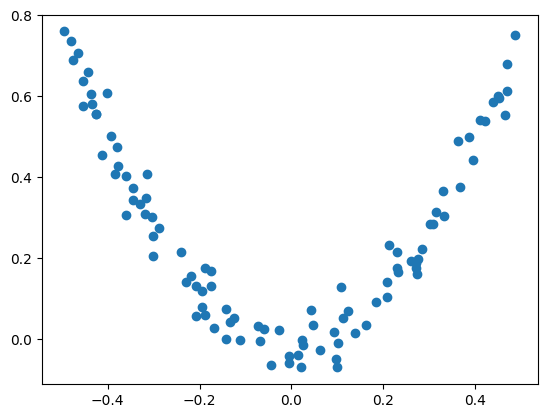

In [8]:
plt.scatter(df['X'], df['y'])

In [9]:
df['pred1'] = df['y'].mean()

In [10]:
df['res1'] = df['y'] - df['pred1']

In [11]:
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


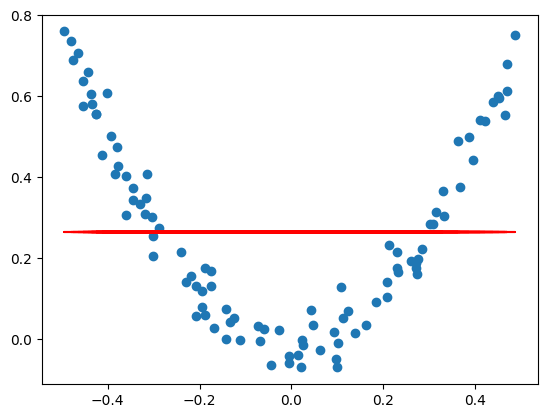

In [14]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='r')

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

tree1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

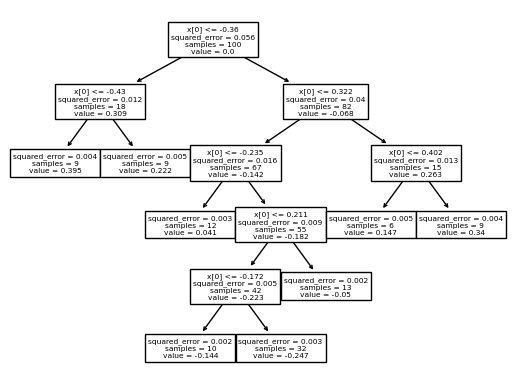

In [20]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [21]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [22]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

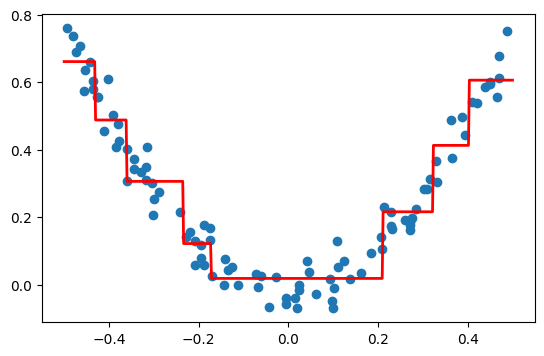

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [24]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [25]:
df['res2'] = df['y'] - df['pred2']

In [26]:
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [27]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [28]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [29]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

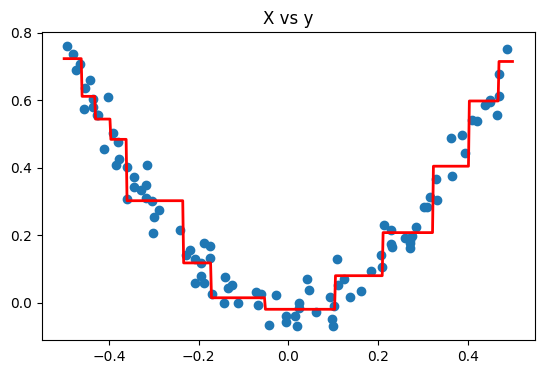

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [31]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

10


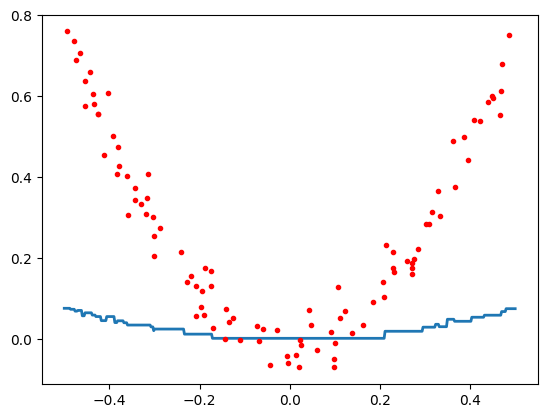

9


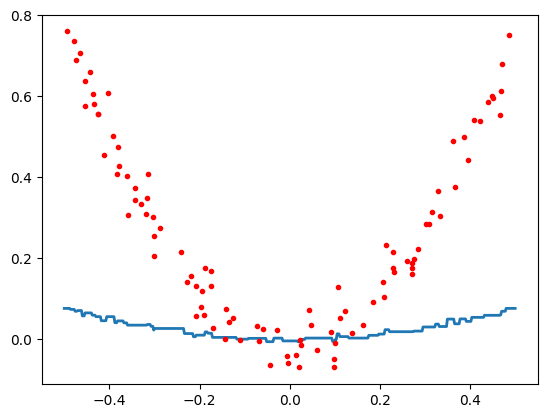

8


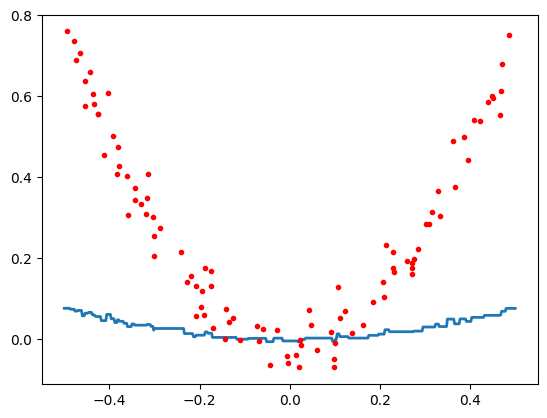

7


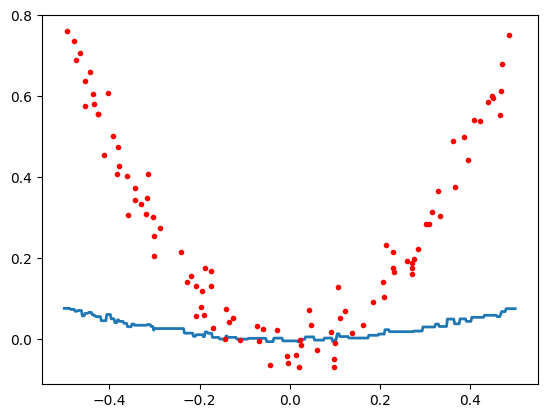

6


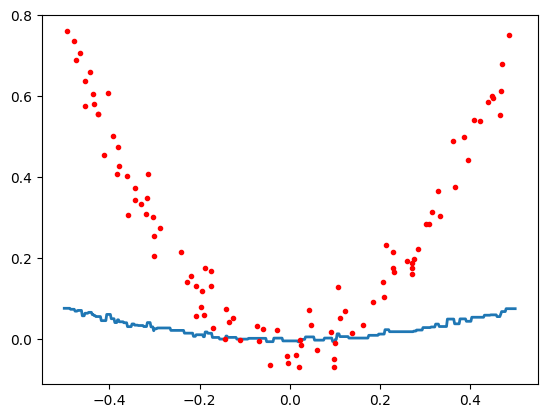

5


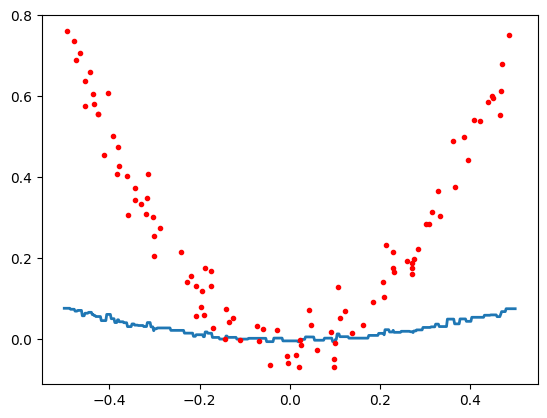

4


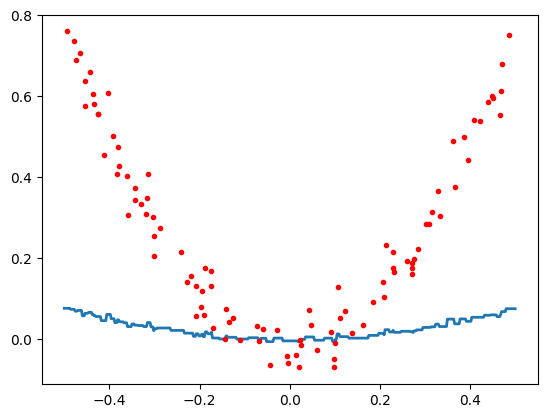

3


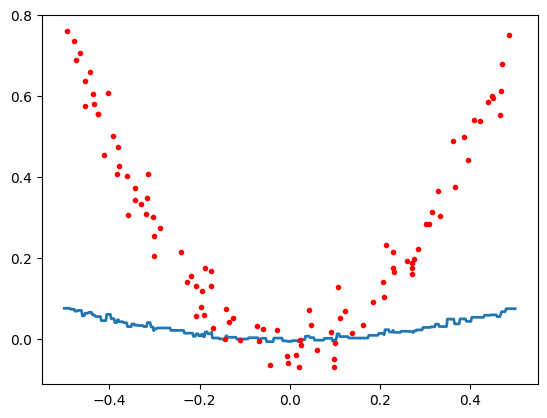

2


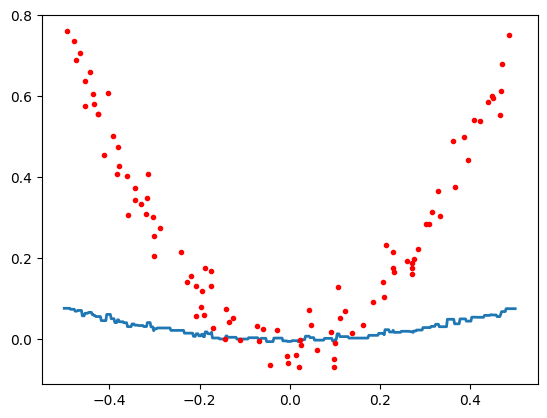

1


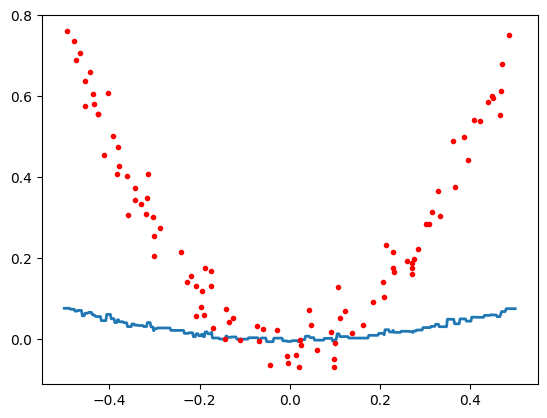

In [32]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,10,lr=0.1)